In [1]:
%matplotlib inline

In [35]:
# Load the Iris dataset from iris.csv into a Pandas DataFrame

import pandas as pd
df = pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [36]:
# Split the DataFrame into independent variables (X) and a dependent variable (y) Series
y = df["species"]
X = df.drop(columns=["species"])
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [47]:
# Train-test split 80/20, stratifying on the target variable
import numpy as np
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=122,
                                                    stratify=y)
test_y

94     versicolor
44         setosa
129     virginica
16         setosa
101     virginica
47         setosa
79     versicolor
135     virginica
147     virginica
64     versicolor
140     virginica
26         setosa
43         setosa
76     versicolor
117     virginica
12         setosa
80     versicolor
34         setosa
139     virginica
82     versicolor
55     versicolor
103     virginica
93     versicolor
10         setosa
125     virginica
15         setosa
71     versicolor
68     versicolor
137     virginica
21         setosa
Name: species, dtype: object

In [39]:
# Instantiate the DecisionTreeClassifier with max_depth=3

from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(max_depth=3)

In [40]:
# Fit the training data
decision_tree_classifier.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=3)

In [41]:
# Show a text representation of the resulting tree
from sklearn import tree

print(tree.export_text(decision_tree_classifier, feature_names=list(train_X.columns)))

|--- petal_length <= 2.45
|   |--- class: setosa
|--- petal_length >  2.45
|   |--- petal_width <= 1.75
|   |   |--- petal_length <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- petal_length >  4.95
|   |   |   |--- class: virginica
|   |--- petal_width >  1.75
|   |   |--- petal_length <= 4.85
|   |   |   |--- class: virginica
|   |   |--- petal_length >  4.85
|   |   |   |--- class: virginica



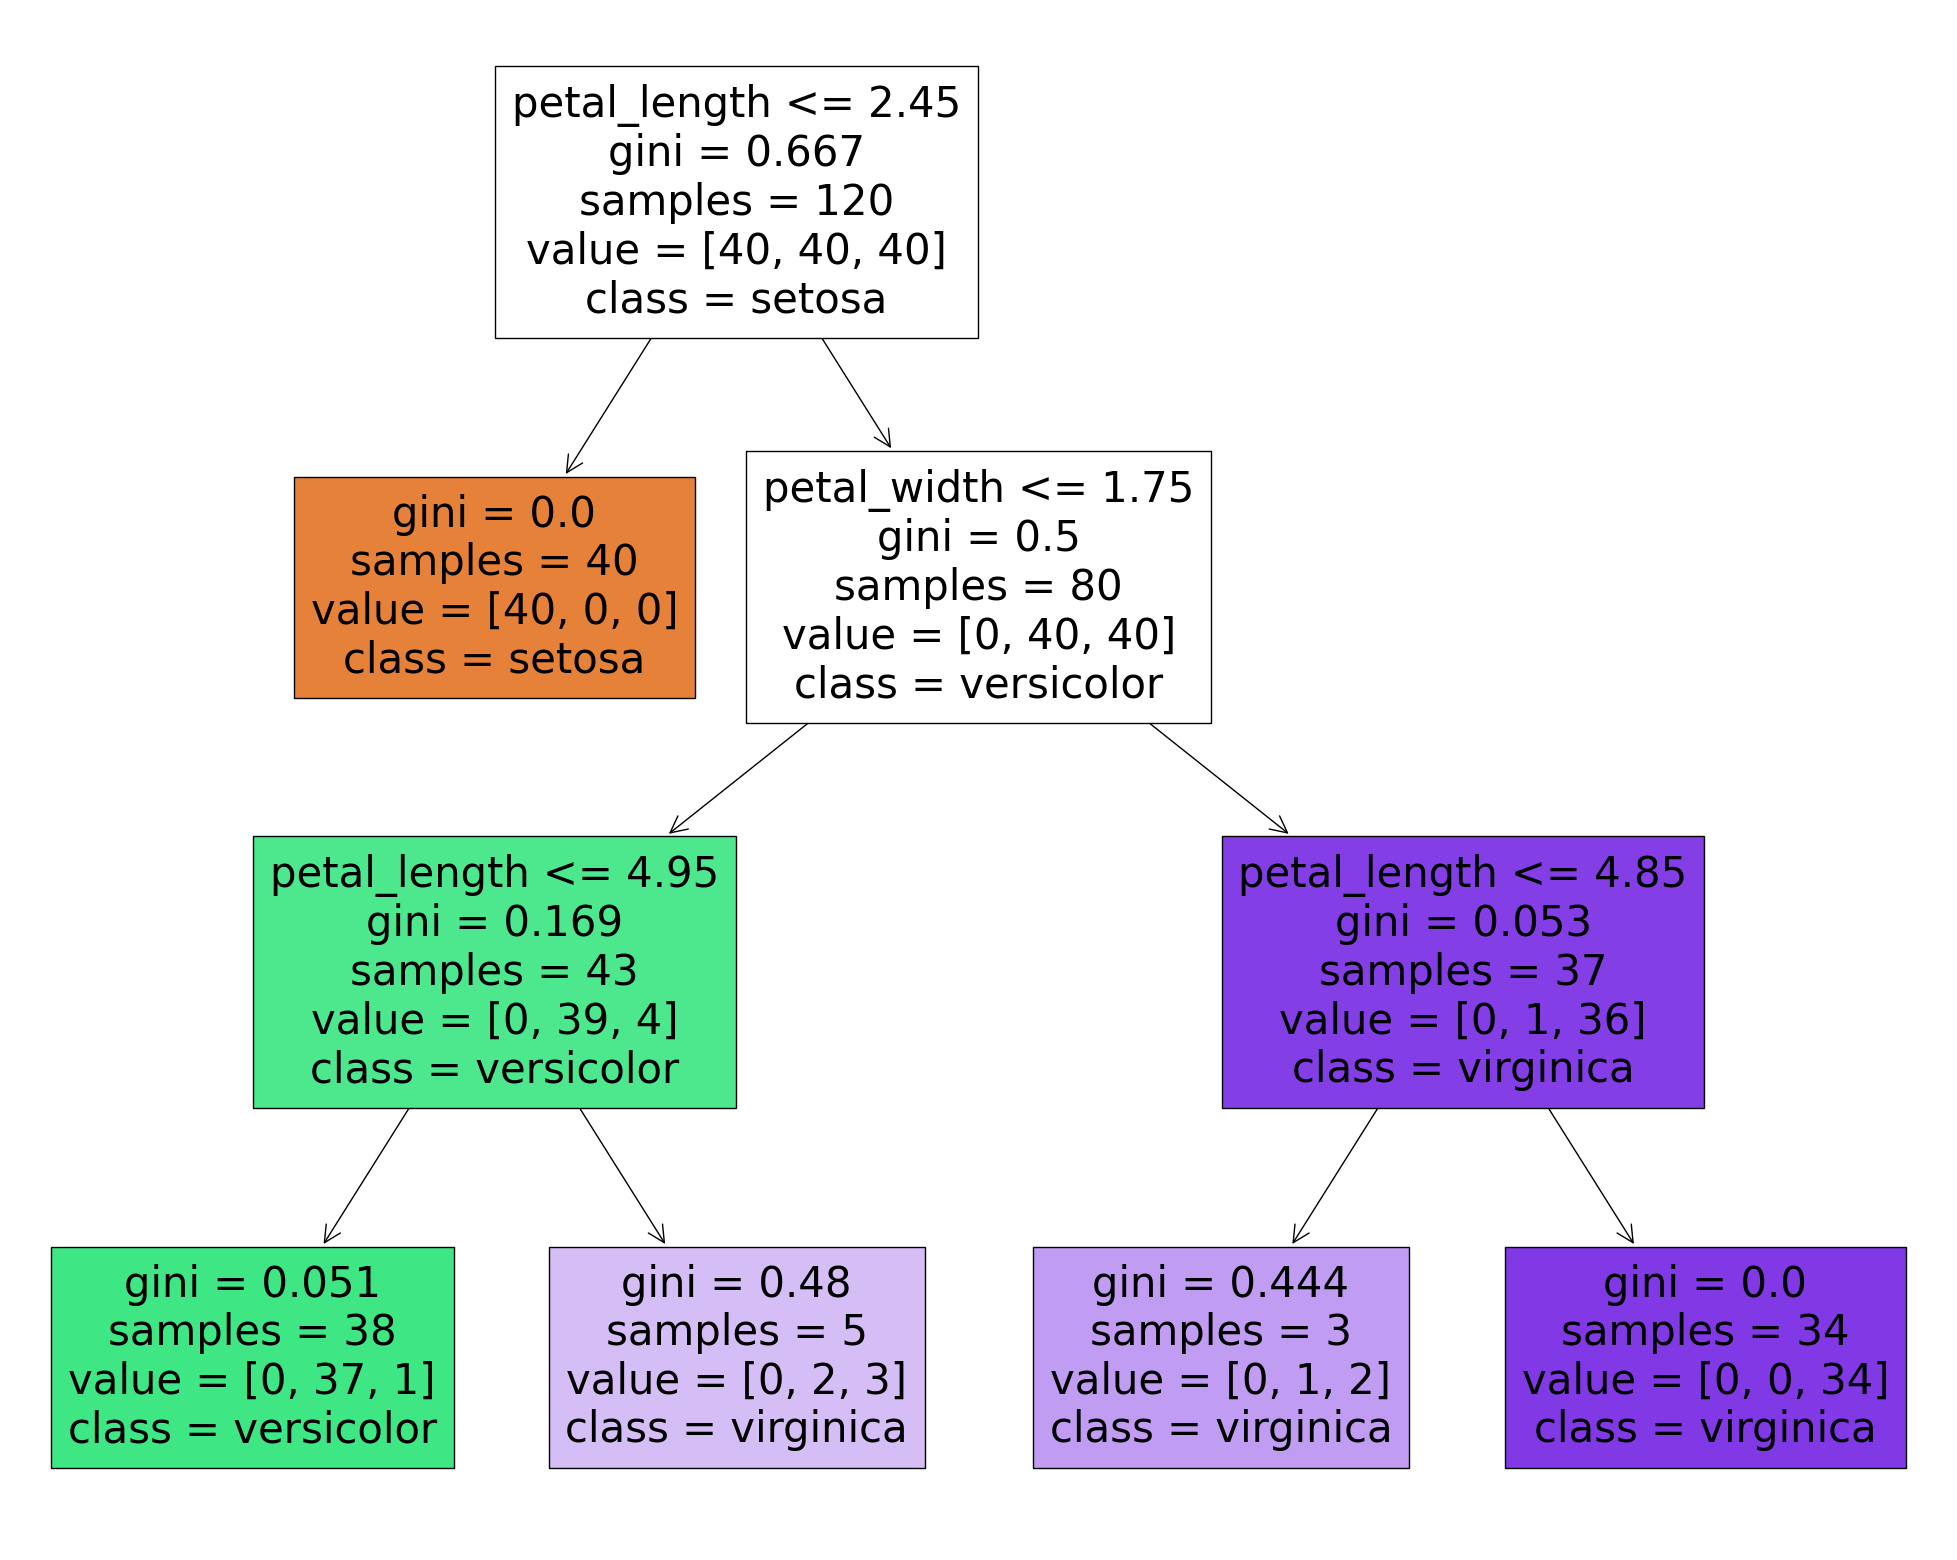

In [42]:
# Use matplotlib/pyplot to visualize the tree

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_classifier,
                   class_names=list(y.unique()),
                   feature_names=list(train_X.columns), filled=True)

/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


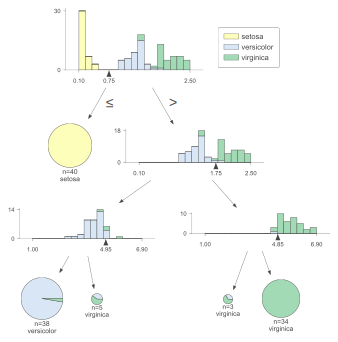

In [43]:
# Optional: visualize the tree with dtreeviz
# Hint: convert class values in y to 0, 1, 2 and re-fit the classifier
!pip install dtreeviz
import dtreeviz
class_values = {"setosa": 0, "versicolor": 1, "virginica": 2}
train_y_numeric = train_y.map(class_values)
numeric_decision_tree_classifier = DecisionTreeClassifier(max_depth=3)
numeric_decision_tree_classifier.fit(train_X, train_y_numeric)
viz_model = dtreeviz.model(numeric_decision_tree_classifier, train_X, train_y_numeric, class_names=list(class_values.keys()))
viz = viz_model.view()
viz

In [44]:
# Show the decision tree classifier's accuracy for the training and test sets
print("Train accuracy:", decision_tree_classifier.score(train_X, train_y))
print("Test accuracy:", decision_tree_classifier.score(test_X, test_y))

Train accuracy: 0.9666666666666667
Test accuracy: 1.0


In [45]:
# Optional: compare the visualizations and accuracy for different max_depth hyperparameter values
for max_depth in range(1, 10):
    decision_tree_classifier = DecisionTreeClassifier(max_depth=max_depth)
    decision_tree_classifier.fit(train_X, train_y)
    print(f"max_depth={max_depth} train accuracy:", decision_tree_classifier.score(train_X, train_y))
    print(f"max_depth={max_depth} test accuracy:", decision_tree_classifier.score(test_X, test_y))

max_depth=1 train accuracy: 0.6666666666666666
max_depth=1 test accuracy: 0.6666666666666666
max_depth=2 train accuracy: 0.9583333333333334
max_depth=2 test accuracy: 0.9666666666666667
max_depth=3 train accuracy: 0.9666666666666667
max_depth=3 test accuracy: 1.0
max_depth=4 train accuracy: 1.0
max_depth=4 test accuracy: 0.9666666666666667
max_depth=5 train accuracy: 1.0
max_depth=5 test accuracy: 0.9666666666666667
max_depth=6 train accuracy: 1.0
max_depth=6 test accuracy: 0.9666666666666667
max_depth=7 train accuracy: 1.0
max_depth=7 test accuracy: 0.9666666666666667
max_depth=8 train accuracy: 1.0
max_depth=8 test accuracy: 0.9666666666666667
max_depth=9 train accuracy: 1.0
max_depth=9 test accuracy: 0.9666666666666667


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Optional: compare the accuracy of the highest-accuracy DecisionTreeClassifier with a LogisticRegression and a KNeighborsClassifier

for classifier in (
    DecisionTreeClassifier(max_depth=3),
    LogisticRegression(),
    KNeighborsClassifier()
):
    classifier.fit(train_X, train_y)
    print(f"{classifier.__class__.__name__} train accuracy:", classifier.score(train_X, train_y))
    print(f"{classifier.__class__.__name__ } test accuracy:", classifier.score(test_X, test_y))

DecisionTreeClassifier train accuracy: 0.9666666666666667
DecisionTreeClassifier test accuracy: 1.0
LogisticRegression train accuracy: 0.9833333333333333
LogisticRegression test accuracy: 1.0
KNeighborsClassifier train accuracy: 0.9666666666666667
KNeighborsClassifier test accuracy: 1.0


/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
/Users/minor/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/U